<a href="https://colab.research.google.com/github/bnElmookhtar/tal5isa/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers  accelerate


In [2]:
pip install --upgrade datasets fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [3]:
from datasets import load_dataset
import datasets

datasets.utils.clean_cache()

ds = load_dataset("knkarthick/dialogsum")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

validation.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [5]:
df_train = ds['train'].to_pandas()

In [6]:
df_train.head()

,id,dialogue,summary,topic
0,train_0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",get a check-up
1,train_1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,vaccines
2,train_2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,find keys
3,train_3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,have a girlfriend
4,train_4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,dance


In [10]:
df_train.describe()

,dialogue,summary
count,12460,12460
unique,12458,12436
top,#Person1#: I'm searching for an old music box....,#Person1# buys a pound of ground beef and thre...
freq,2,2


In [8]:
selected_cols = ['dialogue', 'summary']

In [9]:
df_train = df_train[selected_cols]

In [12]:
df_train['dialogue'].duplicated().sum()

np.int64(2)

In [13]:
df_train['summary'].duplicated().sum()

np.int64(24)

In [14]:
df_train = df_train.drop_duplicates(subset = 'summary')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12436 entries, 0 to 12459
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dialogue  12436 non-null  object
 1   summary   12436 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


In [18]:
df_train['dialogue_len'] = df_train['dialogue'].apply(len)

In [20]:
df_train['summary_len'] = df_train['summary'].apply(len)

In [21]:
df_train.head()

,dialogue,summary,dialogue_len,summary_len
0,"#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...","Mr. Smith's getting a check-up, and Doctor Haw...",931,187
1,"#Person1#: Hello Mrs. Parker, how have you bee...",Mrs Parker takes Ricky for his vaccines. Dr. P...,776,101
2,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,500,81
3,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,526,110
4,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,480,93


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

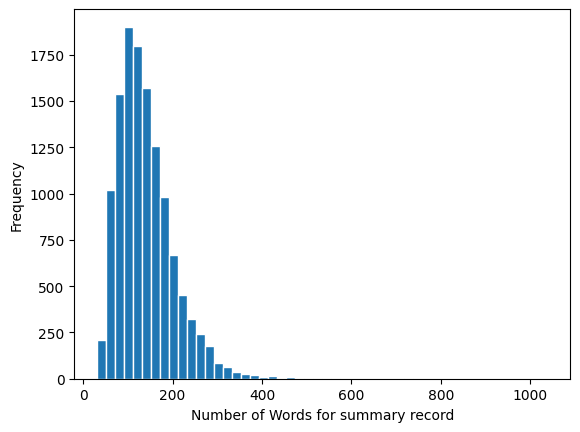

In [24]:
plt.hist(df_train['summary_len'],bins = 50 , edgecolor = 'white')
plt.xlabel('Number of Words for summary record')
plt.ylabel('Frequency')
plt.title('Distrpution of words ber summary')
plt.show()

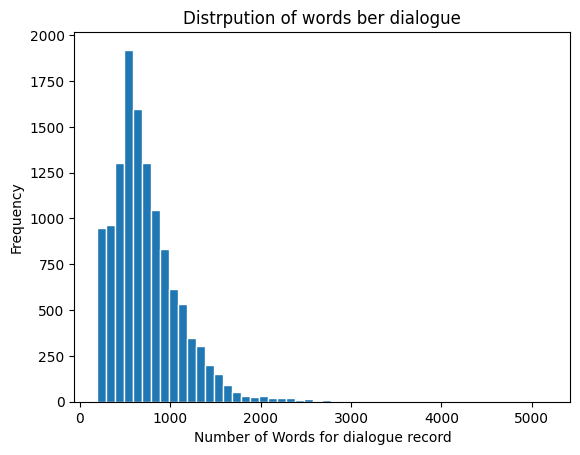

In [25]:
plt.hist(df_train['dialogue_len'],bins = 50 , edgecolor = 'white')
plt.xlabel('Number of Words for dialogue record')
plt.ylabel('Frequency')
plt.title('Distrpution of words ber dialogue')
plt.show()

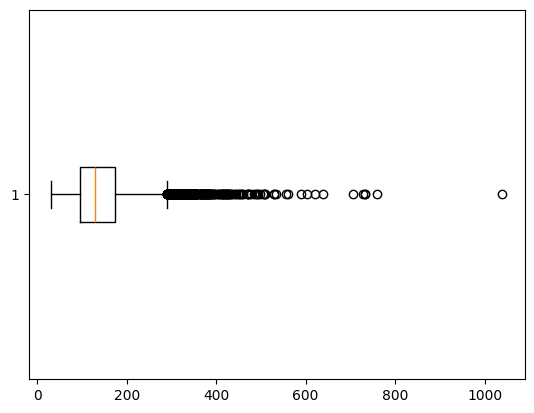

In [27]:
plt.boxplot(df_train['summary_len'], vert = False)
plt.show()

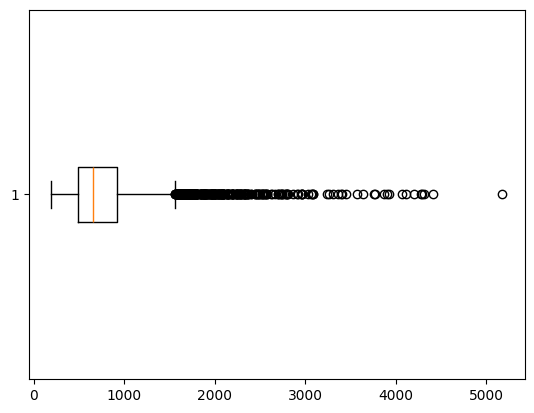

In [28]:
plt.boxplot(df_train['dialogue_len'], vert = False)
plt.show()

In [29]:
Q1 = df_train['dialogue_len'].quantile(0.25)
Q3 = df_train['dialogue_len'].quantile(0.75)
IQR = Q3 - Q1
df_train = df_train[(df_train['dialogue_len'] < Q3 + 1.5 * IQR) & (df_train['dialogue_len'] > Q1 - 1.5 * IQR)]

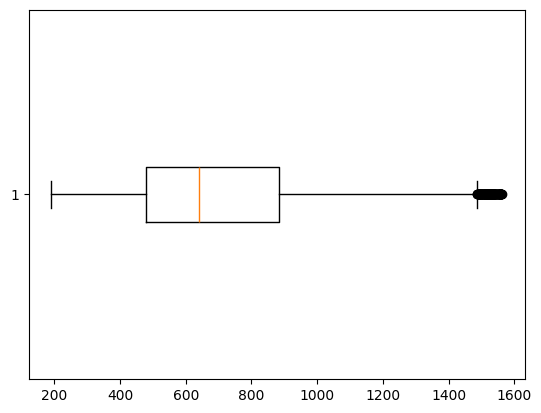

In [30]:
plt.boxplot(df_train['dialogue_len'], vert = False)
plt.show()

In [32]:
Q1 = df_train['summary_len'].quantile(0.25)
Q3 = df_train['summary_len'].quantile(0.75)
IQR = Q3 - Q1
df_train = df_train[(df_train['summary_len'] < Q3 + 1.5 * IQR) & (df_train['summary_len'] > Q1 - 1.5 * IQR)]

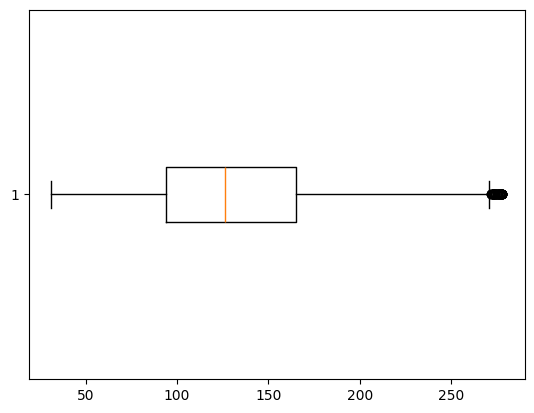

In [33]:
plt.boxplot(df_train['summary_len'], vert = False)
plt.show()

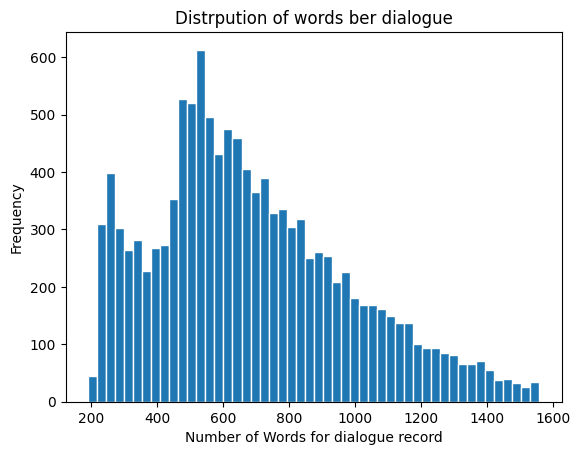

In [34]:
plt.hist(df_train['dialogue_len'],bins = 50 , edgecolor = 'white')
plt.xlabel('Number of Words for dialogue record')
plt.ylabel('Frequency')
plt.title('Distrpution of words ber dialogue')
plt.show()

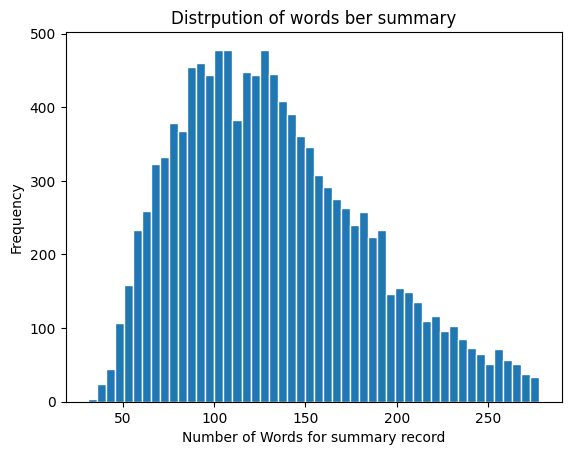

In [36]:
plt.hist(df_train['summary_len'],bins = 50 , edgecolor = 'white')
plt.xlabel('Number of Words for summary record')
plt.ylabel('Frequency')
plt.title('Distrpution of words ber summary')
plt.show()

In [41]:
df_train = df_train[(df_train['dialogue_len']>400) &(df_train['dialogue_len']<500) ]

In [42]:
df_train.shape

(1393, 4)

In [43]:
df_train_samples = df_train.sample(frac= 0.1 , random_state= 42)